/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')


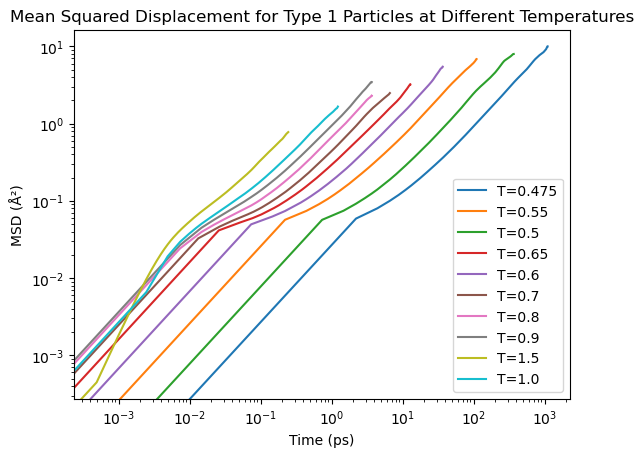

In [1]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import re
from MDAnalysis.analysis.msd import EinsteinMSD  # 导入 EinsteinMSD

# 创建 Figures 文件夹
output_dir = "Figures"
os.makedirs(output_dir, exist_ok=True)

# 获取 .lammpstrj 和 .dcd 文件路径
lammpstrj_files = sorted(glob.glob("../equil/*.lammpstrj"))  # 替换为实际的 .lammpstrj 文件路径
dcd_files = sorted(glob.glob("../prod/*.unwrap.dcd"))  # 替换为实际的 .dcd 文件路径

# 定义 MSD 计算函数
def calculate_msd(universe, particle_type):
    msd_anal = EinsteinMSD(universe, select=f"type {particle_type}", msd_type="xyz", fft=True)
    msd_anal.run()
    times = msd_anal.times  # 获取时间数据
    msd_values = msd_anal.results.timeseries  # 获取 MSD 数据
    return times, msd_values

# 绘制 log-log 图
plt.figure()

# 循环加载拓扑和轨迹文件，计算 MSD
for lammpstrj_file, dcd_file in zip(lammpstrj_files, dcd_files):
    # 使用正则表达式从文件名中提取温度
    match = re.search(r'T(\d+\.?\d*)', lammpstrj_file)
    if match:
        temp = float(match.group(1))  # 提取到的温度值转换为浮点数
    else:
        print(f"无法从文件名 {lammpstrj_file} 提取温度信息")
        continue
    
    universe = mda.Universe(lammpstrj_file, dcd_file, topology_format="LAMMPSDUMP")
    
    # 计算类型 1 粒子的 MSD
    times, msd1 = calculate_msd(universe, particle_type=1)

    # 在 log-log 图上绘制 MSD
    plt.loglog(times, msd1, label=f'T={temp}')

plt.xlabel('Time (ps)')
plt.ylabel('MSD (Å²)')
plt.title('Mean Squared Displacement for Type 1 Particles at Different Temperatures')
plt.legend()
plt.savefig(f"{output_dir}/MSD_Type1_LogLog.png")
plt.show()
